# Notebook Iteracion 1 Modelado

### Objetivo:
Crear un modelo de línea base como punto de partida para un primer vistazo de datos y métricas
- Analisis de distribucion y atípicos sobre la variables precio
- Construccion de una regresión lineal como modelo línea base


In [13]:
# Librerías para estructuras de datos
import pandas as pd
import numpy as np

# Librerías sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Librerías para gráficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Métricas de evaluación del modelo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import iqr # Interquartile range

**Lectura de datos**

Se leen los datos resultantes del proceso de scraping y el tratamiento de datos

In [14]:
import os 
# get current directory
path = os.getcwd()
# parent directory
path = os.path.dirname(path)
data_model = pd.read_csv(path + "/1_datos/base_modelado.csv")
data_model.head()

,precio,zona,barrio_sector,baños_familiares,area_bruta,numero_niveles,parqueaderos,alcobas_familiares,estrato,area_total,...,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma,tipo_cocina_freq,tipo_pisos_freq
0,1100000.0,centro,castilla,1.0,95.0,1.0,0.0,3.0,0.0,95.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
1,950000.0,centro,el salvador,1.0,70.0,1.0,0.0,2.0,3.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
2,970000.0,centro,los angeles,1.0,38.0,1.0,0.0,1.0,4.0,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
3,1400000.0,centro,prado,1.0,50.0,1.0,1.0,2.0,0.0,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
4,800000.0,centro,12 de octubre,1.0,92.0,1.0,0.0,3.0,2.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709


**Analisis de variable precio**:

En esta iteración se procede a hacer un analisis sobre la variable objetivo, al finalizar el proceso de scraping observamos que se tienen valores demasiado grandes que afectan la visualización de esta, por tanto, se procede a hacer un tratamiento de datos atípicos sobre la variable respuesta

In [15]:
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

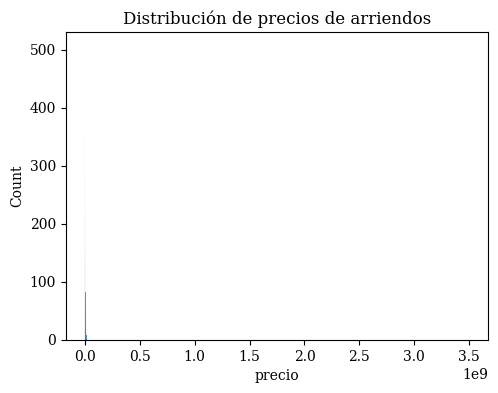

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Distribución de precios de arriendos')
sns.histplot(data_model['precio'])
plt.show()

Dada la distribución de la variable precio es necesario hacer un tratamiento de datos atípicos, esto se hará por medio de rango intercuartil

In [17]:
# Definición del rango intercuartil
iqr_precio = iqr(data_model["precio"], axis = 0, rng = (25, 75), interpolation = 'midpoint')
print("Rango intercuartil para variable precio: ", iqr_precio)

Rango intercuartil para variable precio:  3200000.0


In [21]:
# Calculo de percentiles y límites inferior y superior
q1 = np.percentile(data_model["precio"], 25, method = 'midpoint')
q3 = np.percentile(data_model["precio"], 75, method = 'midpoint')

min_limite = q1 - 1.5*iqr_precio
max_limite = q3 + 1.5*iqr_precio

print(f"quartil 1: {q1} quartil 3: {q3}")
print("Límites inferiores = ", min_limite)
print("Límites superiores = ", max_limite)

quartil 1: 1500000.0 quartil 3: 4700000.0
Límites inferiores =  -3300000.0
Límites superiores =  9500000.0


In [6]:
df_data = df_data[(df_data['precio'] > -3300000) & (df_data['precio'] <= 9500000)]

In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3231
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   precio                       3027 non-null   float64
 1   baños_familiares             3027 non-null   float64
 2   area_bruta                   3027 non-null   float64
 3   numero_niveles               3027 non-null   float64
 4   parqueaderos                 3027 non-null   float64
 5   alcobas_familiares           3027 non-null   float64
 6   estrato                      3027 non-null   float64
 7   area_total                   3027 non-null   float64
 8   juegos_infantiles            3027 non-null   float64
 9   balcon                       3027 non-null   float64
 10  zona_ropas                   3027 non-null   float64
 11  camaras_cctv                 3027 non-null   float64
 12  cancha_polideportiva         3027 non-null   float64
 13  ascensor          

In [8]:
df_data.shape

(3027, 37)

In [9]:
df_data.isna().sum()

precio                         0
baños_familiares               0
area_bruta                     0
numero_niveles                 0
parqueaderos                   0
alcobas_familiares             0
estrato                        0
area_total                     0
juegos_infantiles              0
balcon                         0
zona_ropas                     0
camaras_cctv                   0
cancha_polideportiva           0
ascensor                       0
cancha_squash                  0
zona_bbq                       0
patio                          0
unidad_cerrada_conjunto        0
zonas_verdes                   0
aire_acondicionado             0
jacuzzi                        0
red_de_Gas                     0
turco                          0
porteria_24_7                  0
sauna                          0
calentador_de_agua             0
terraza                        0
closet_de_linos                0
biblioteca                     0
parqueadero_visitantes         0
gimnasio  

# Tratamiento de datos

In [10]:
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]

In [11]:
x = df_data[pred_columns]
y = df_data[['precio']]

C:\Users\user\AppData\Local\Temp\ipykernel_21712\2752363422.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


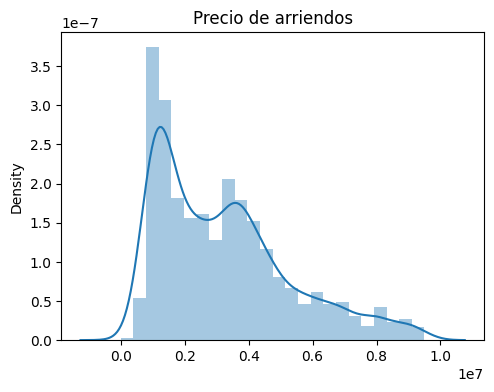

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Precio de arriendos')
sns.distplot(y)

plt.show()


## Estandarización

In [13]:
MM = MinMaxScaler()
x_norm = MM.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)

In [14]:
x_norm.head()

,baños_familiares,area_bruta,numero_niveles,parqueaderos,alcobas_familiares,estrato,area_total,juegos_infantiles,balcon,zona_ropas,...,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma,tipo_cocina_freq,tipo_pisos_freq
0,0.076923,0.165103,0.000103,0.000000,0.230769,0.000000,0.168190,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
1,0.076923,0.118199,0.000103,0.000000,0.153846,0.500000,0.122486,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092158,1.0
2,0.076923,0.058161,0.000103,0.000000,0.076923,0.666667,0.063985,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092158,1.0
3,0.076923,0.080675,0.000103,0.076923,0.153846,0.000000,0.085923,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
4,0.076923,0.159475,0.000103,0.000000,0.230769,0.333333,0.162706,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0


In [15]:
x_norm.shape

(3027, 36)

## División de los datos

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (2270, 36)
Tamaño de los Datos de Validación =  (757, 36)
Tamaño del Vector de Clases de Entrenamiento =  (2270, 1)
Tamaño del Vector de Clases de Prueba =  (757, 1)


# Modelo

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Importancia de variables

In [18]:
importancia = lr.coef_
importancia = pd.DataFrame(importancia[0], index=pred_columns, columns = ['precio'])
importancia_ordenada = importancia.sort_values(by = ['precio'], ascending=False)
display(importancia_ordenada)

,precio
parqueaderos,4.629637e+06
area_total,4.374983e+06
area_bruta,4.012338e+06
baños_familiares,3.166819e+06
estrato,1.228668e+06
aire_acondicionado,1.217766e+06
unidad_cerrada_conjunto,5.049167e+05
sauna,3.952749e+05
terraza,3.247268e+05
cancha_squash,2.940241e+05


Los coeficientes positivos indican que predicen una tendencia creciente y los coeficientes negativos indican que predicen una tendencia decreciente de la variable de salida del modelo.

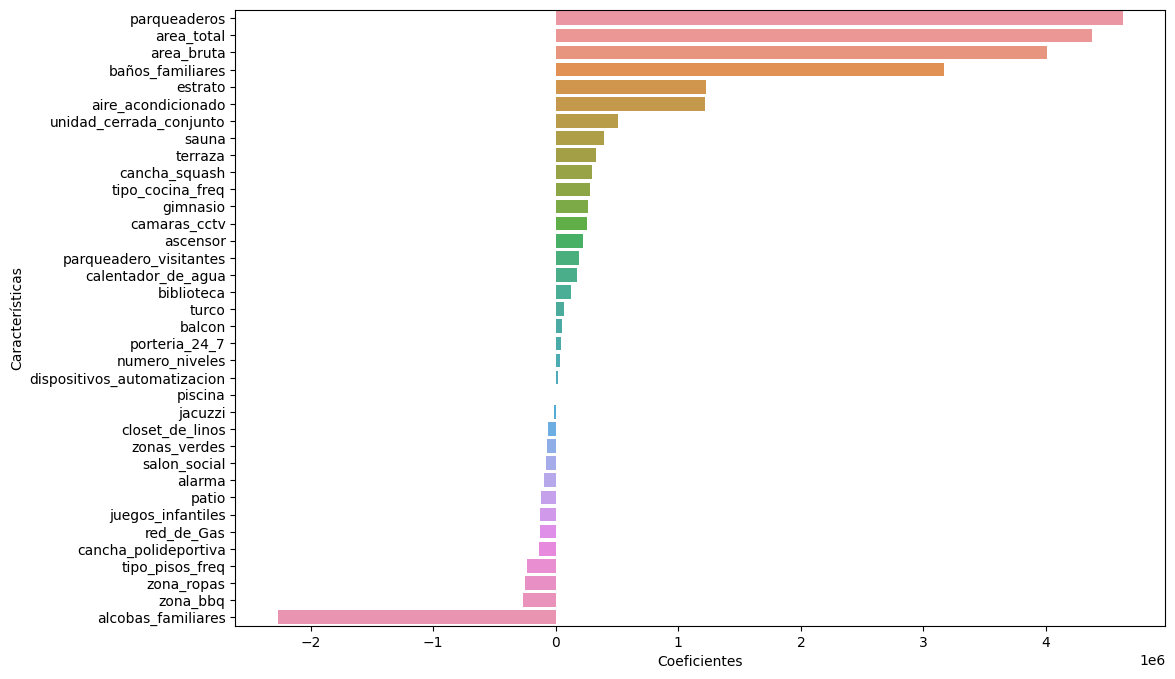

In [19]:
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig = plt.figure(figsize=(12,8))

sns.barplot(y = importancia_ordenada.index, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

# Validación

In [20]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train #reduccion de dimensionalidad del dataset
prediccion_train = lr.predict(x_train)
residuos_train   = prediccion_train - y_train

In [21]:
import statsmodels.api as sm

C:\Users\user\AppData\Local\Temp\ipykernel_21712\54985228.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
c:\Users\user\pyEnviroments\pyscraping\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


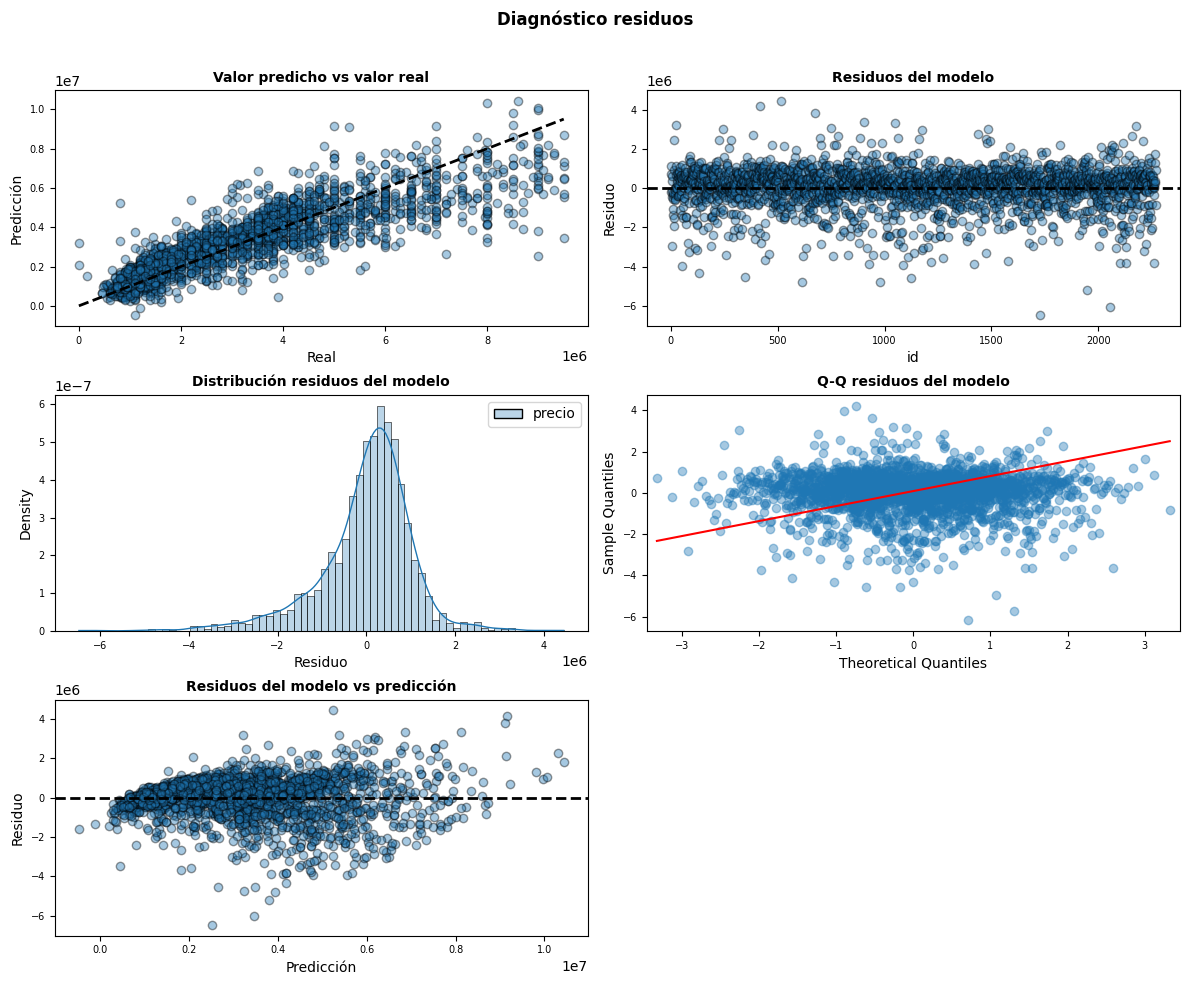

In [22]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [23]:
# Error de test del modelo 
# ==============================================================================


predicciones = lr.predict(x_test)


mse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=predicciones, squared=False)
MAE = mean_absolute_error(y_true=y_test, y_pred  = predicciones)
MedAE = median_absolute_error(y_true=y_test, y_pred  = predicciones)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred  = predicciones)
r2 = r2_score(y_true=y_test, y_pred=predicciones)

print(f"El error MSE   de test es: {mse}")
print(f"El error RMSE  de test es: {rmse}")
print(f"El error MAE   de test es: {MAE}")
print(f"El error MedAE de test es: {MedAE}")
print(f"El error R2    de test es: {r2}")
print(f"El error MAPE    de test es: {mape}")


El error MSE   de test es: 1177917972143.528
El error RMSE  de test es: 1085319.295020377
El error MAE   de test es: 781372.8172599921
El error MedAE de test es: 552350.761211358
El error R2    de test es: 0.730607199407634
El error MAPE    de test es: 0.2737368680995307


In [24]:
Puntaje_4 = explained_variance_score(y_test, predicciones) # Se calcula la varianza Explicada
print("Varianza Explicada = {:.4f}".format(Puntaje_4))

Varianza Explicada = 0.7316
